# [Spaceship Titanic](https://www.kaggle.com/competitions/spaceship-titanic/)

## Description

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

<br>
<div style="text-align: center;">
    <img src="https://storage.googleapis.com/kaggle-media/competitions/Spaceship%20Titanic/joel-filipe-QwoNAhbmLLo-unsplash.jpg" alt="Deep Space" style="width: 400px;"/>
</div>

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!


## Evaluation

### Metric
Submissions are evaluated based on their [classification accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy), the percentage of predicted labels that are correct.

### Submission Format
The submission format for the competition is a csv file with the following format:

```js
PassengerId,Transported
0013_01,False
0018_01,False
0019_01,False
0021_01,False
etc.
```

## Dataset Description

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.
<br><br>

### File and Data Field Descriptions
- **train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
    - ```PassengerId``` - A unique Id for each passenger. Each Id takes the form ```gggg_pp``` where ```gggg``` indicates a group the passenger is travelling with and ```pp``` is their number within the group. People in a group are often family members, but not always.
    - ```HomePlanet``` - The planet the passenger departed from, typically their planet of permanent residence.
    - ```CryoSleep``` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    - ```Cabin``` - The cabin number where the passenger is staying. Takes the form ```deck/num/side```, where side can be either ```P``` for *Port* or ```S``` for *Starboard*.
    - ```Destination``` - The planet the passenger will be debarking to.
    - ```Age``` - The age of the passenger.
    - ```VIP``` - Whether the passenger has paid for special VIP service during the voyage.
    - ```RoomService```, ```FoodCourt```, ```ShoppingMall```, ```Spa```, ```VRDeck``` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    - ```Name``` - The first and last names of the passenger.
    - ```Transported``` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.<br><br>
- **test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of ```Transported``` for the passengers in this set.<br><br>
- **sample_submission.csv** - A submission file in the correct format.
    - ```PassengerId``` - Id for each passenger in the test set.
    - ```Transported``` - The target. For each passenger, predict either ```True``` or ```False```.

---

## Spaceship Titanic

### Importing libs

In [1]:
# necessary imports
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2024-11-13 13:49:09.069262: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-13 13:49:09.080403: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-13 13:49:09.083591: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-13 13:49:09.093182: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-13 13:49:09.772430: W tensorflow/compiler/tf2

In [2]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.17.0
TensorFlow Decision Forests v1.10.0


### Loading the dataset

In [3]:
dataset_df = pd.read_csv("train.csv")
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (8693, 14)


The data is composed of 14 columns and 8693 entries

In [4]:
dataset_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


There are 12 feature columns. Using these features your model has to predict whether the passenger is rescued or not indicated by the column ```Transported```.



### Let's perform a basic exploration of the dataset

In [5]:
dataset_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


#### Bar chart for ```Transported```

<Axes: xlabel='Transported'>

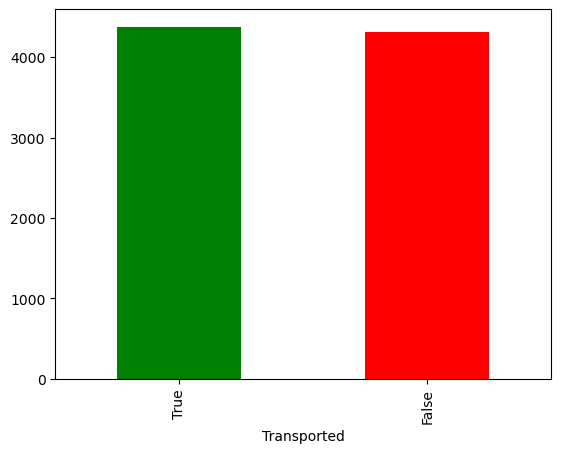

In [7]:
plot_df = dataset_df.Transported.value_counts()
plot_df.plot(kind="bar", color=('green','red'))

#### Numerical data distribution

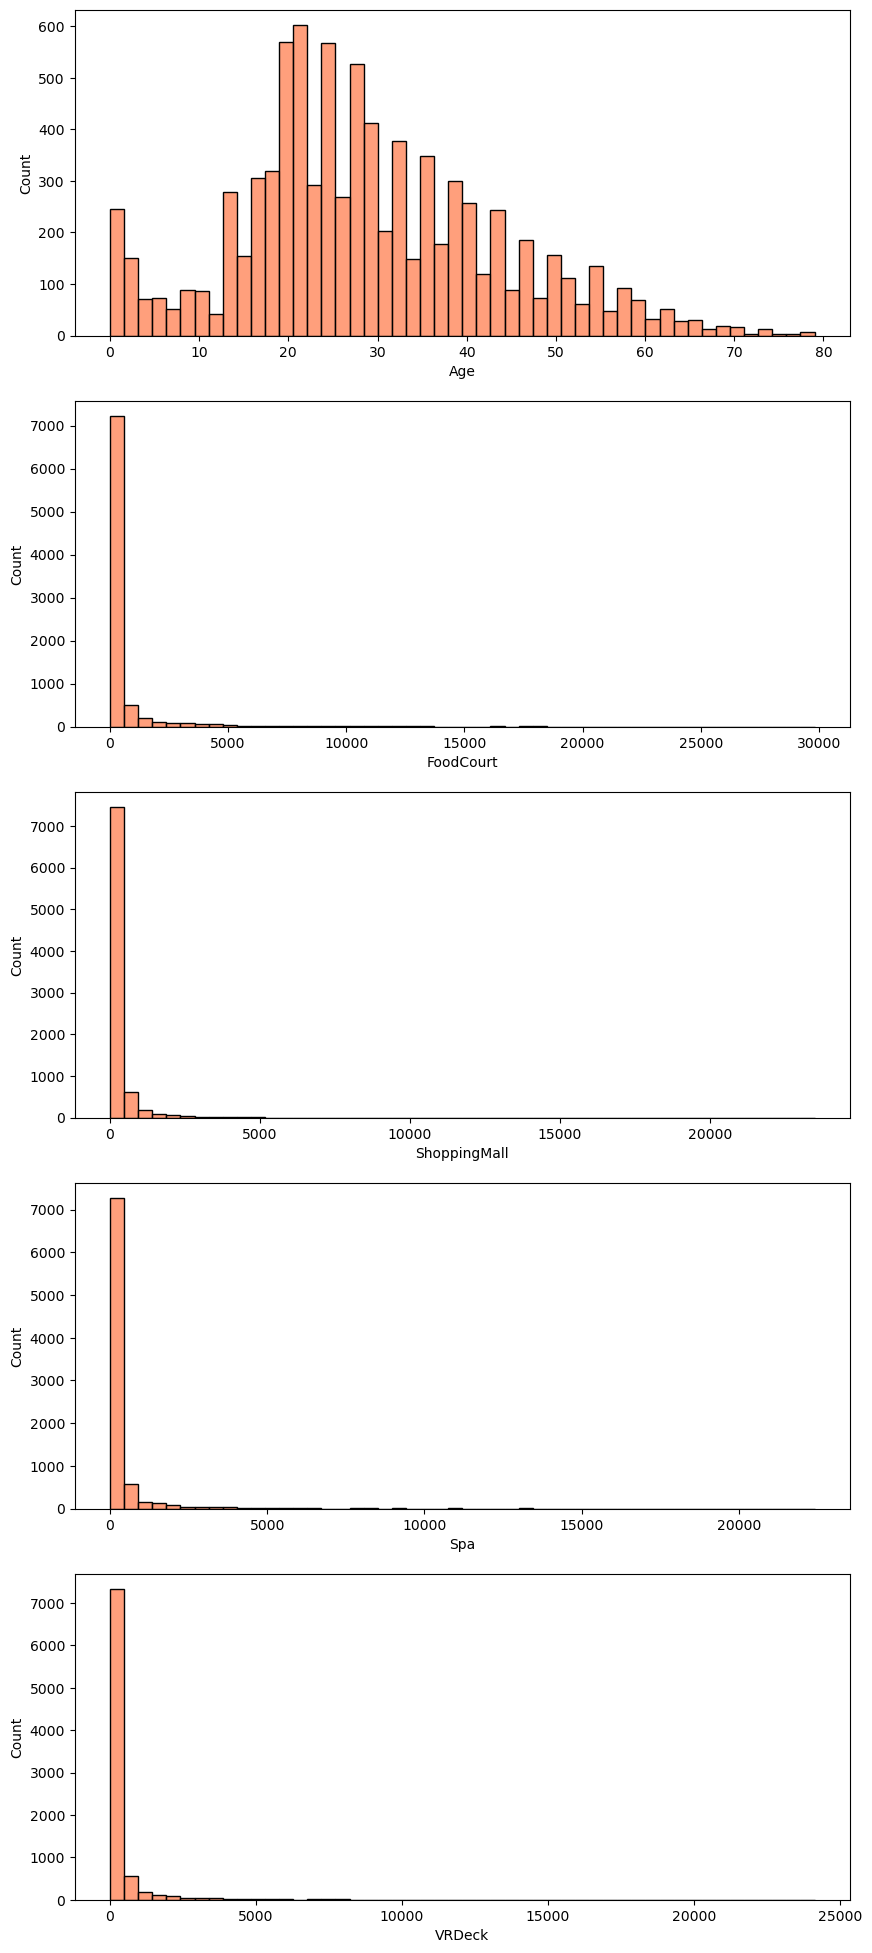

In [8]:
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(dataset_df['Age'], color='coral', bins=50, ax=ax[0]);
sns.histplot(dataset_df['FoodCourt'], color='coral', bins=50, ax=ax[1]);
sns.histplot(dataset_df['ShoppingMall'], color='coral', bins=50, ax=ax[2]);
sns.histplot(dataset_df['Spa'], color='coral', bins=50, ax=ax[3]);
sns.histplot(dataset_df['VRDeck'], color='coral', bins=50, ax=ax[4]);

### Let's Prepare the dataset

We will drop both ```PassengerId``` and ```Name``` columns as they are not necessary for model training

In [9]:
dataset_df = dataset_df.drop(['PassengerId', 'Name'], axis=1)
dataset_df.head(3)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False


Let's check for the missing values

In [10]:
dataset_df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

This dataset contains a mix of numeric, categorical and missing features. TF-DF supports all these feature types natively, and no preprocessing is required.

But this datatset also has boolean fields with missing values. TF-DF doesn't support boolean fields yet. So we need to convert those fields into int. 

To account for the missing values let's input it with the mean values for each column.

In [11]:
numerical_columns = ['FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
dataset_df[numerical_columns] = dataset_df[numerical_columns].fillna(dataset_df[numerical_columns].mean())

categorical_columns = ['VIP', 'CryoSleep']
dataset_df[categorical_columns] = dataset_df[categorical_columns].fillna(dataset_df[categorical_columns].mode().iloc[0])

dataset_df.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Cabin           199
Destination     182
RoomService     181
Age             179
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

Since, TF-DF cannot handle boolean columns, we will have to adjust the labels in column Transported to convert them into the integer format that TF-DF expects.

In [12]:
label = "Transported"
dataset_df[label] = dataset_df[label].astype(int)

Let's convert the boolean fields CryoSleep and VIP to int

In [13]:
dataset_df['VIP'] = dataset_df['VIP'].astype(int)
dataset_df['CryoSleep'] = dataset_df['CryoSleep'].astype(int)

The value of column ```Cabin``` is a string with the format ```Deck/Cabin_num/Side```. Here we will split the ```Cabin``` column and create 3 new columns ```Deck```, ```Cabin_num``` and ```Side```, since it will be easier to train the model on those individual data.

In [14]:
dataset_df[["Deck", "Cabin_num", "Side"]] = dataset_df["Cabin"].str.split("/", expand=True)

In [15]:
dataset_df.head(3)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S


Now, we can remove ```Cabin``` feature from the dataset

In [16]:
try:
    dataset_df = dataset_df.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")

In [17]:
dataset_df.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S


In [18]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int64  
 11  Deck          8494 non-null   object 
 12  Cabin_num     8494 non-null   object 
 13  Side          8494 non-null   object 
dtypes: float64(6), int64(3), object(5)
memory usage: 950.9+ KB


In [19]:
# dataset_df.isnull().sum().sort_values(ascending=False)

#### We still have the following missing values:

- HomePlanet      201 -> object
- Deck            199 -> object
- Cabin_num       199 -> object
- Side            199 -> object
- Destination     182 -> object
- RoomService     181 -> float64
- Age             179 -> float64

Let's fill them with mode and mean

In [20]:
categorical_columns = ['HomePlanet', 'Deck', 'Cabin_num', 'Side', 'Destination']
dataset_df[categorical_columns] = dataset_df[categorical_columns].fillna(dataset_df[categorical_columns].mode().iloc[0])

numerical_columns = ['RoomService', 'Age']
dataset_df[numerical_columns] = dataset_df[numerical_columns].fillna(dataset_df[numerical_columns].mean())

dataset_df.isnull().sum().sort_values(ascending=False)

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Cabin_num       0
Side            0
dtype: int64

#### Let's Split the dataset

In [21]:
train_ds_pd, valid_ds_pd = train_test_split(
    dataset_df, 
    test_size=0.2, 
    random_state=42, 
    stratify=dataset_df[label]
)

We need to transform it to tensorflow dataset

In [22]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label)

I0000 00:00:1731516551.974873   91721 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-13 13:49:12.253751: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Checking the distribution

In [23]:
print(f"{len(train_ds_pd)} examples in train the set and {len(valid_ds_pd)} examples in the validation set")

6954 examples in train the set and 1739 examples in the validation set


In [24]:
train_distribution = train_ds_pd[label].value_counts(normalize=True)
print(train_distribution)

Transported
1    0.503595
0    0.496405
Name: proportion, dtype: float64


In [25]:
valid_distribution = valid_ds_pd[label].value_counts(normalize=True)
print(valid_distribution)

Transported
1    0.503738
0    0.496262
Name: proportion, dtype: float64


## First submission

### We can select a model or use them all

There are several tree-based models for you to choose from.
- RandomForestModel
- GradientBoostedTreesModel
- CartModel
- DistributedGradientBoostedTreesModel

In [26]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

##### Configure the model

TensorFlow Decision Forests provides good defaults for you (e.g. the top ranking hyperparameters on our benchmarks, slightly modified to run in reasonable time). If you would like to configure the learning algorithm, you will find many options you can explore to get the highest possible accuracy.

You can select a template and/or set parameters as follows:

```rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1")```

#### Let's create a Random Forest with our data

In [27]:
rf = tfdf.keras.RandomForestModel()
rf.compile(metrics=["accuracy"]) # Optional, you can use this to include a list of eval metrics

Use /tmp/tmpgoc_dksx as temporary training directory


#### Starting the training phase

In [28]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:02.368458. Found 6954 examples.
Training model...


I0000 00:00:1731516554.742494   91721 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1731516554.742913   91721 kernel.cc:775] Collect training examples
I0000 00:00:1731516554.742960   91721 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1731516554.743243   91721 kernel.cc:394] Number of batches: 7
I0000 00:00:1731516554.743279   91721 kernel.cc:395] Number of examples: 6954
I0000 00:00:1731516554.744862   91721 data_spec_inference.cc:306] 1273 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Cabin_num (472 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:

Model trained in 0:00:07.908972
Compiling model...


I0000 00:00:1731516562.584073   91721 decision_forest.cc:761] Model loaded with 300 root(s), 233660 node(s), and 13 input feature(s).
I0000 00:00:1731516562.587329   91721 abstract_model.cc:1323] Engine "RandomForestGeneric" built
2024-11-13 13:49:22.587374: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.


### Visualize the model

One benefit of tree-based models is that we can easily visualize them.

In [29]:
# There are 300 trees (by default), let's visualize the first
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

#### Evaluate the model on the Out of bag (OOB) data and the validation dataset

Before training the dataset we have manually seperated 20% of the dataset for validation named as ```valid_ds```.

We can also use Out of bag (OOB) score to validate our RandomForestModel. To train a Random Forest Model, a set of random samples from training set are choosen by the algorithm and the rest of the samples are used to finetune the model.The subset of data that is not chosen is known as Out of bag data (OOB). OOB score is computed on the OOB data.

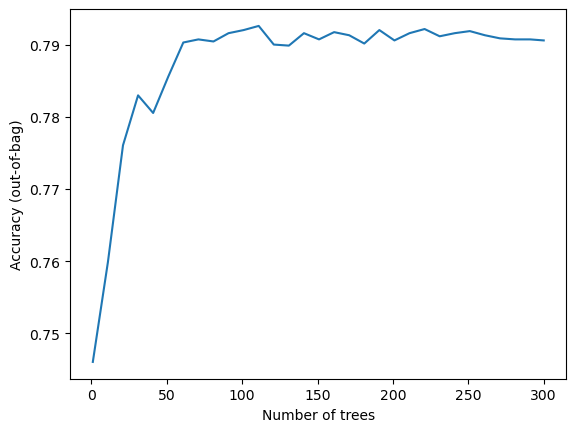

In [30]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

We can also see some general stats on the OOB dataset:

In [31]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=6954, accuracy=0.7906241012366984, loss=0.5550227396493241, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

Now, let us run an evaluation using the validation dataset

In [32]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 0s 42ms/step - loss: 0.0000e+00 - accuracy: 0.8010
loss: 0.0000
accuracy: 0.8010


### Variable importances
Variable importances generally indicate how much a feature contributes to the model predictions or quality. 

There are several ways to identify important features using TensorFlow Decision Forests. Let us list the available ```Variable Importances``` for Decision Trees:

In [33]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 SUM_SCORE
	 NUM_NODES


As an example, let us display the important features for the Variable Importance ```NUM_AS_ROOT```.

The larger the importance score for ```NUM_AS_ROOT```, the more impact it has on the outcome of the model.

By default, the list is sorted from the most important to the least. From the output you can infer that the feature at the top of the list is used as the root node in most number of trees in the random forest than any other feature.

In [34]:
# Each line is: (feature name, (index of the feature), importance score)
inspector.variable_importances()["NUM_AS_ROOT"]

[("CryoSleep" (1; #2), 113.0),
 ("RoomService" (1; #7), 64.0),
 ("Spa" (1; #10), 62.0),
 ("VRDeck" (1; #12), 26.0),
 ("ShoppingMall" (1; #8), 17.0),
 ("FoodCourt" (1; #5), 8.0),
 ("Deck" (4; #3), 5.0),
 ("HomePlanet" (4; #6), 5.0)]

## Second Submission

Let's test different models

In [35]:
train_ds_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6954 entries, 3600 to 7925
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6954 non-null   object 
 1   CryoSleep     6954 non-null   int64  
 2   Destination   6954 non-null   object 
 3   Age           6954 non-null   float64
 4   VIP           6954 non-null   int64  
 5   RoomService   6954 non-null   float64
 6   FoodCourt     6954 non-null   float64
 7   ShoppingMall  6954 non-null   float64
 8   Spa           6954 non-null   float64
 9   VRDeck        6954 non-null   float64
 10  Transported   6954 non-null   int64  
 11  Deck          6954 non-null   object 
 12  Cabin_num     6954 non-null   object 
 13  Side          6954 non-null   object 
dtypes: float64(6), int64(3), object(5)
memory usage: 814.9+ KB


In [36]:
# Identificar colunas categóricas
categorical_columns = ['HomePlanet', 'Destination', 'Deck', 'Cabin_num', 'Side']

# Aplicar One-Hot Encoding às colunas categóricas
train_ds_pd_encoded = pd.get_dummies(train_ds_pd, columns=categorical_columns, drop_first=True)
valid_ds_pd_encoded = pd.get_dummies(valid_ds_pd, columns=categorical_columns, drop_first=True)

# Garantir que ambas as tabelas tenham as mesmas colunas (o mesmo One-Hot Encoding)
valid_ds_pd_encoded = valid_ds_pd_encoded.reindex(columns=train_ds_pd_encoded.columns, fill_value=0)

In [37]:
# Converter todas as colunas para float32
train_ds_pd_encoded = train_ds_pd_encoded.astype('float32')
valid_ds_pd_encoded = valid_ds_pd_encoded.astype('float32')

In [38]:
import tensorflow as tf

# Separar features e labels para o TensorFlow
X_train = train_ds_pd_encoded.drop(columns=['Transported'])
y_train = train_ds_pd_encoded['Transported']
X_valid = valid_ds_pd_encoded.drop(columns=['Transported'])
y_valid = valid_ds_pd_encoded['Transported']

# Converter para o formato tf.data.Dataset
train_ds = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values)).batch(64)
valid_ds = tf.data.Dataset.from_tensor_slices((X_valid.values, y_valid.values)).batch(64)

In [39]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Definir o modelo de rede neural
def build_model():
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=[X_train.shape[1]]),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Instanciar o modelo
model = build_model()

# Configurar callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',       # Monitorar a perda na validação
    patience=15,              # Continuar por 15 épocas sem melhoria antes de parar
    restore_best_weights=True # Restaurar os melhores pesos no final
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',       # Monitorar a perda na validação
    factor=0.2,               # Reduzir a taxa de aprendizado em 20% se não melhorar
    patience=5,               # Esperar 5 épocas antes de reduzir
    min_lr=1e-5               # Define a taxa de aprendizado mínima
)


/home/jrz/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
# Treinar o modelo
history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=100,                   # Definir um número de épocas alto para permitir que o EarlyStopping atue
    callbacks=[early_stopping, reduce_lr]
)

# Avaliar o modelo no conjunto de validação
val_loss, val_accuracy = model.evaluate(valid_ds)
print("Validation Accuracy:", val_accuracy)


Epoch 1/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7078 - loss: 0.6481 - val_accuracy: 0.7987 - val_loss: 0.5026 - learning_rate: 0.0010
Epoch 2/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7526 - loss: 0.5270 - val_accuracy: 0.7959 - val_loss: 0.4754 - learning_rate: 0.0010
Epoch 3/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7541 - loss: 0.5041 - val_accuracy: 0.7884 - val_loss: 0.4589 - learning_rate: 0.0010
Epoch 4/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7568 - loss: 0.4895 - val_accuracy: 0.7947 - val_loss: 0.4441 - learning_rate: 0.0010
Epoch 5/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7592 - loss: 0.4889 - val_accuracy: 0.7918 - val_loss: 0.4388 - learning_rate: 0.0010
Epoch 6/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7710 - loss: 0.4564 - val_accuracy: 0.7648 - val_loss: 0.4437 - learning_rate: 0.0010
Epoch 7/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7775 - loss: 0.

# Submission

In [41]:
# Load the test dataset
test_df = pd.read_csv('test.csv')
submission_id = test_df['PassengerId']

# Impute missing values with the mode for categorical columns
categorical_columns = ['VIP', 'CryoSleep']
test_df[categorical_columns] = test_df[categorical_columns].fillna(test_df[categorical_columns].mode().iloc[0])

# Impute missing values with the mean for numerical columns
numerical_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age']
test_df[numerical_columns] = test_df[numerical_columns].fillna(test_df[numerical_columns].mean())

# Create new columns - Deck, Cabin_num, and Side from the Cabin column, then drop Cabin
test_df[['Deck', 'Cabin_num', 'Side']] = test_df['Cabin'].str.split("/", expand=True)
test_df = test_df.drop('Cabin', axis=1)

# Convert boolean columns (VIP, CryoSleep) to integers
test_df['VIP'] = test_df['VIP'].astype(int)
test_df['CryoSleep'] = test_df['CryoSleep'].astype(int)

# Convert the pandas DataFrame to a TensorFlow Decision Forests compatible dataset
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df)

# Get predictions for the test dataset
predictions = rf.predict(test_ds)
n_predictions = (predictions > 0.5).astype(bool)

# Create the submission DataFrame in the required format
output = pd.DataFrame({'PassengerId': submission_id,
                       'Transported': n_predictions.squeeze()})

# Display the first few rows to verify the result
output.head()

5/5 [==============================] - 0s 43ms/step


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [42]:
sample_submission_df = pd.read_csv('sample_submission.csv')
sample_submission_df['Transported'] = n_predictions
sample_submission_df.to_csv('submission.csv', index=False)
sample_submission_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
